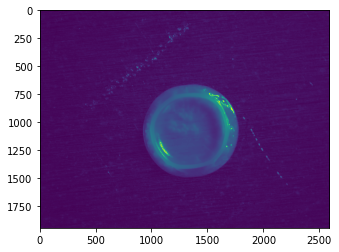

In [82]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
# %matplotlib widget

#load the image
image = skimage.io.imread('../data/raw/dn/DBM_50uL_70C_C1_a.bmp')

fig, ax = plt.subplots()
plt.imshow(image)
plt.show()

/var/folders/mg/pccyc4ld2433fc6qddtspnrr0000gn/T/ipykernel_34033/1154233623.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_image = skimage.color.rgb2gray(image)


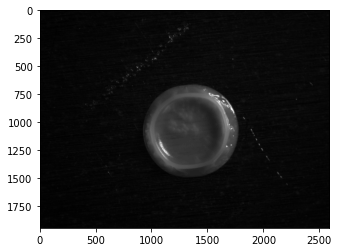

In [83]:
# convert the image to grayscale
gray_image = skimage.color.rgb2gray(image)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap='gray')
plt.show()

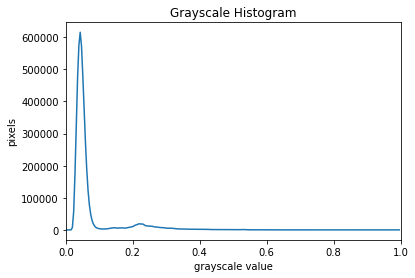

In [84]:
# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))

plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()

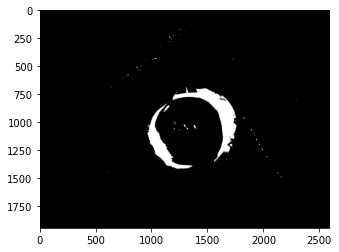

In [91]:
# create a mask based on the threshold
t = 0.3
binary_mask = blurred_image > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap='gray')
plt.show()

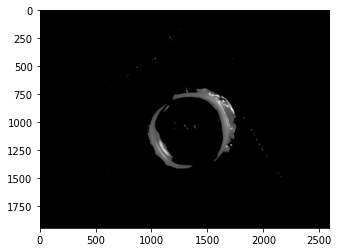

In [92]:
from PIL import Image
import numpy as np

# # Open the input image as numpy array
# npImage=np.array(Image.open("image.jpg"))
# # Open the mask image as numpy array
# npMask=np.array(Image.open("mask2.jpg").convert("RGB"))

# # Make a binary array identifying where the mask is black
# cond = npMask<128

# Select image or mask according to condition array
pixels=np.where(binary_mask, gray_image, blurred_image)

# Save resulting image
result=Image.fromarray(pixels)
# result.save('result.png')
plt.imshow(result)
plt.show()

In [95]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def detect_circles(pil_image):

    open_cv_image = np.array(pil_image.convert('RGB')) 
    # Convert RGB to BGR 
    img = open_cv_image[:, :, ::-1].copy() 
#     img = cv2.cv.CreateImageHeader(pimg.size,cv2.IPL_DEPTH_8U,3)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray = np.asarray(img)
    plt.imshow(gray)
    plt.show()
    blurred = cv2.medianBlur(gray, 25) #cv2.bilateralFilter(gray,10,50,50)


    minDist = 150
    param1 = 30 #500
    param2 = 50 #200 #smaller value-> more false circles
    minRadius = 0
    maxRadius = 0 #10

    # docstring of HoughCircles: HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
#     circles = cv2.HoughCircles(blurred,cv2.HOUGH_GRADIENT,1,60,param1=50,param2=30,minRadius=0,maxRadius=0)
#     circles = cv2.HoughCircles(blurred,cv2.HOUGH_GRADIENT,1,minDist,param1=50,param2=30,minRadius=0,maxRadius=0)

    print('circles are ', circles)
    # Red color in BGR
#     color = (0, 0, 255)
    color = (255, 0, 0)
    # Line thickness of -1 px
    thickness = 10
  
    # Using cv2.circle() method
    # Draw a circle of red color of thickness -1 px
#     image = cv2.circle(image, center_coordinates, radius, color, thickness)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        num = 1
        for i in circles[0,:]:
            print('i is ', i)
            num = num + 1
            cv2.circle(img, (i[0], i[1]), i[2], color, num)
            cv2.circle(img,(i[0],i[1]),20,color,3)
#             if if_inner:
#                 cv2.circle(img, (i[0], i[1]), i[2]-150, color, num * thickness)

    # Show result for testing:
    # cv2.imshow('img', img)
    plt.imshow(img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

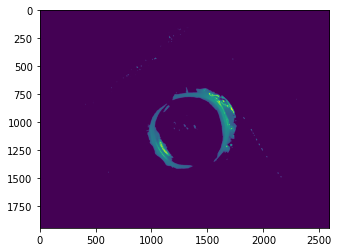

circles are  [[[1328.5 1076.5  307.5]]]
i is  [1328 1076  308]


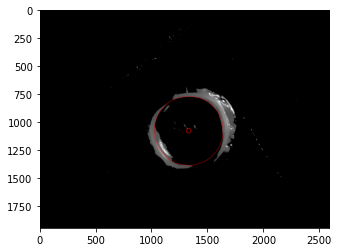

In [96]:
detect_circles(result)
# x = 1338
# y = 1078
# r = 418